In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import boxcox
import seaborn as sns

import scipy as sp
import scipy.stats as stats
from scipy.stats import bootstrap

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import probplot
from scipy.stats import norm

In [20]:
df = pd.read_excel('Micro.xlsx')

In [21]:
df_shallow = df['Shallow']
df_shallow = df_shallow.dropna()

df_Deep = df['Deep']
df_Deep = df_Deep.dropna()

df_Cave = df['Cave']
df_Cave = df_Cave.dropna()

df_sum = df['sum']
df_sum = df_sum.dropna()

In [22]:
print(df_shallow.shape)
print(df_Deep.shape)
print(df_Cave.shape)
print(df_sum.shape)

(502,)
(603,)
(184,)
(1289,)


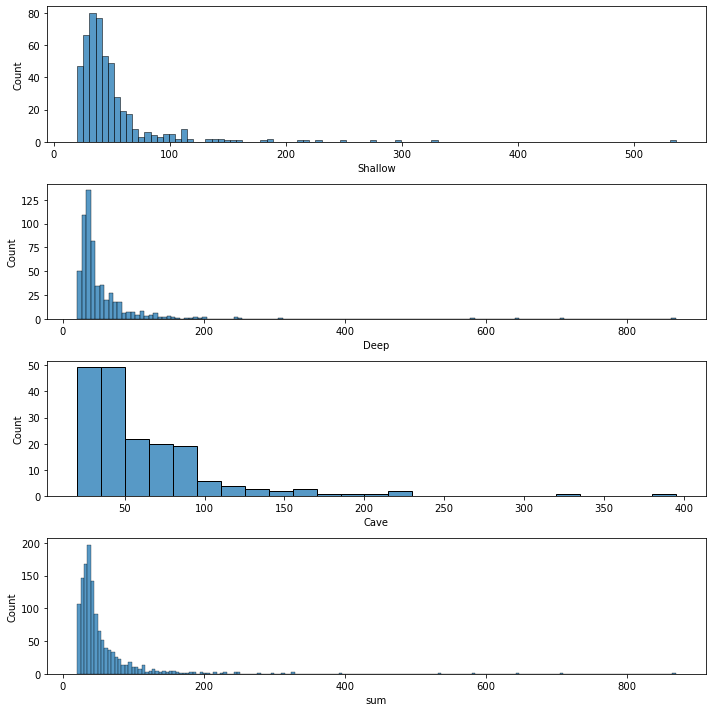

In [23]:
plt.figure(figsize=(10,10))

for i,col in enumerate(df[['Shallow', 'Deep', 'Cave', 'sum']]):
    plt.subplot(4,1,i + 1)
    sns.histplot(x= col, data=df)
    
plt.tight_layout()

plt.show()

In [24]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(df_shallow, len(df_shallow))
    return func(bs_sample)

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(df_Deep, len(df_Deep))
    return func(bs_sample)

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(df_Cave, len(df_Cave))
    return func(bs_sample)

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(df_sum, len(df_sum))
    return func(bs_sample)

In [25]:
bs_replicates = np.empty(5000)

for i in range(5000):
    bs_replicates[i] = bootstrap_replicate_1d(df_shallow, np.mean)

In [26]:
bs_replicates2 = np.empty(5000)

for i in range(5000):
    bs_replicates2[i] = bootstrap_replicate_1d(df_Deep, np.mean)

In [27]:
bs_replicates3 = np.empty(5000)

for i in range(5000):
    bs_replicates3[i] = bootstrap_replicate_1d(df_Cave, np.mean)

In [28]:
bs_replicates4 = np.empty(5000)

for i in range(5000):
    bs_replicates4[i] = bootstrap_replicate_1d(df_sum, np.mean)

In [29]:
bs = pd.DataFrame(bs_replicates)
bs2 = pd.DataFrame(bs_replicates2)
bs3 = pd.DataFrame(bs_replicates3)
bs4 = pd.DataFrame(bs_replicates4)

In [30]:
BS = pd.concat([bs,bs2,bs3,bs4], axis =1)
BS.columns = ['bs_Shallow', 'bs_Deep', 'bs_Cave', 'bs_Sum']

In [31]:
BS.to_excel('Bootstrap_MP2.xlsx', index=False)

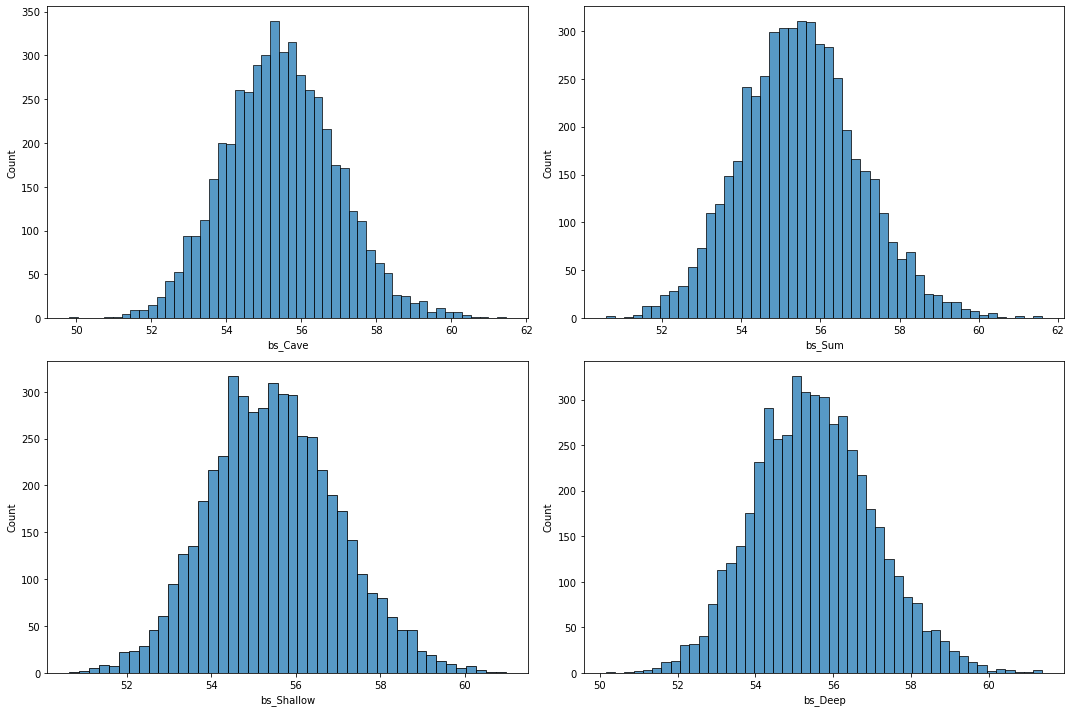

In [32]:
plt.figure(figsize=(15,10))

for i,col in enumerate(BS[{'bs_Shallow', 'bs_Deep', 'bs_Cave', 'bs_Sum'}]):
    plt.subplot(2,2,i + 1)
    sns.histplot(x=col, data=BS)
    
plt.tight_layout()

plt.show()